In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df_new = pd.read_csv('./csv/oscar_age_processed.csv', skipinitialspace=True)

In [3]:
df_new

,year,age,name,movie,gender
0,1927,22,Janet Gaynor,"Seventh Heaven, Street Angel and Sunrise: A So...",f
1,1928,37,Mary Pickford,Coquette,f
2,1929,28,Norma Shearer,The Divorcee,f
3,1930,63,Marie Dressler,Min and Bill,f
4,1931,32,Helen Hayes,The Sin of Madelon Claudet,f
...,...,...,...,...,...
187,2018,37,Rami Malek,Bohemian Rhapsody,m
188,2019,45,Joaquin Phoenix,Joker,m
189,2020,83,Anthony Hopkins,The Father,m
190,2021,53,Will Smith,King Richard,m


Qui a obtenu le plus d'oscar 

In [4]:
oscar_counts = df_new.groupby(['name', 'gender']).size()
oscar_counts = oscar_counts.reset_index(name='count')
top_winners = oscar_counts.sort_values(by='count', ascending=False).groupby('gender').head(1)
print(top_winners)

                 name gender  count
95  Katharine Hepburn      f      4
26   Daniel Day-Lewis      m      3


Moyenne d'age et graph correspondant 

In [5]:
average_age = df_new.groupby('gender')['age'].mean()
print("Moyenne d'age : ",average_age)

Moyenne d'age :  gender
f    37.125000
m    44.552083
Name: age, dtype: float64


<Axes: xlabel='gender'>

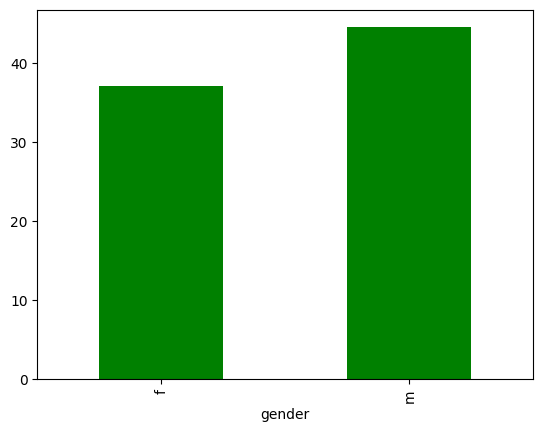

In [6]:
average_age.plot(kind='bar', color='green')

évolution de l'age moyen par décennie, avec histogramme et régression linéaire


âge moyen par genre,
évolution de l'age moyen par décennie, avec histogramme et régression linéaire
corrélation entre genre et âge
qui des hommes ou des femmes a le plus tendance à être multi-oscarisé ?
y a-t-il plus de multi-oscarisés par décennie ?

In [7]:
df_new['decade']=(df_new['year']//10)*10
df_new['decade']

0      1920
1      1920
2      1920
3      1930
4      1930
       ... 
187    2010
188    2010
189    2020
190    2020
191    2020
Name: decade, Length: 192, dtype: int64

In [8]:
grouped_by_decade = df_new.groupby('decade')

In [9]:
# Grouper par décennie et par genre, puis calculer l'âge moyen
age_moyen_par_genre = df_new.groupby(['decade', 'gender'])['age'].mean()

# Afficher les résultats
print(age_moyen_par_genre)


decade  gender
1920    f         29.000000
        m         49.000000
1930    f         31.900000
        m         40.200000
1940    f         31.500000
        m         42.800000
1950    f         36.700000
        m         41.000000
1960    f         36.000000
        m         45.500000
1970    f         35.700000
        m         44.800000
1980    f         45.400000
        m         47.400000
1990    f         35.800000
        m         44.600000
2000    f         36.100000
        m         43.300000
2010    f         41.900000
        m         44.400000
2020    f         55.666667
        m         63.333333
Name: age, dtype: float64


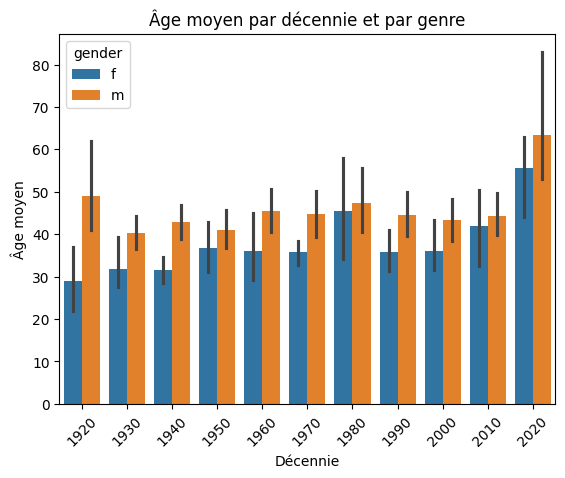

In [10]:
sns.barplot(data=df_new, x='decade', y='age', hue='gender')

# Ajouter un titre et des étiquettes d'axe
plt.title("Âge moyen par décennie et par genre")
plt.xlabel("Décennie")
plt.ylabel("Âge moyen")
plt.xticks(rotation=45)
plt.show()

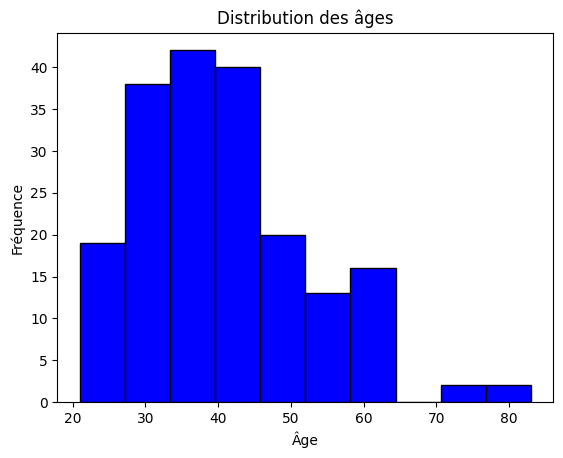

In [11]:
# Créer l'histogramme
plt.hist(df_new['age'], bins=10, color='blue', edgecolor='black')

# Ajouter un titre et des labels d'axes
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()


<Axes: xlabel='decade,gender'>

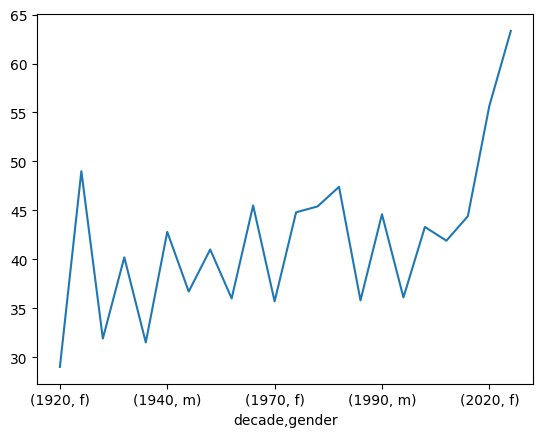

In [12]:
age_moyen_par_genre.plot()

In [13]:
# Regrouper les données par décennie et par genre, puis calculer l'âge moyen
evolution_age_moyen_gender = df_new.groupby(['decade', 'gender'])['age'].mean().reset_index()

# Créer un modèle de régression linéaire
model = LinearRegression()

# Séparer les données par genre
donnees_hommes = evolution_age_moyen_gender[evolution_age_moyen_gender['gender'] == 'm']
donnees_femmes = evolution_age_moyen_gender[evolution_age_moyen_gender['gender'] == 'f']

# Ajuster le modèle pour les données des genres
model.fit(donnees_hommes[['decade']], donnees_hommes['age'])
model.fit(donnees_femmes[['decade']], donnees_femmes['age'])

# Prédire l'âge moyen pour chaque décennie
predictions_hommes = model.predict(donnees_hommes[['decade']])
predictions_femmes = model.predict(donnees_femmes[['decade']])

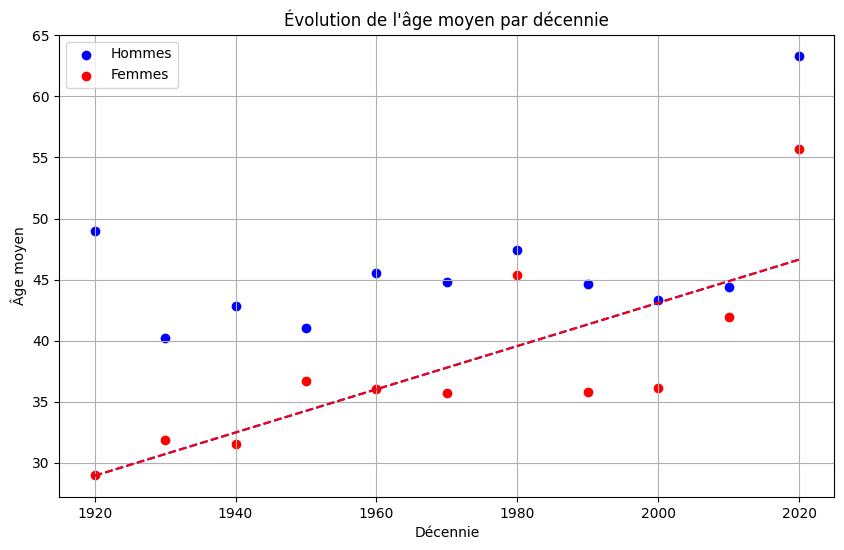

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Scatter plot pour les données des hommes
plt.scatter(donnees_hommes['decade'], donnees_hommes['age'], color='blue', label='Hommes')
# Line plot pour la régression linéaire des hommes
plt.plot(donnees_hommes['decade'], predictions_hommes, color='blue', linestyle='--')

# Scatter plot pour les données des femmes
plt.scatter(donnees_femmes['decade'], donnees_femmes['age'], color='red', label='Femmes')
# Line plot pour la régression linéaire des femmes
plt.plot(donnees_femmes['decade'], predictions_femmes, color='red', linestyle='--')

plt.title("Évolution de l'âge moyen par décennie")
plt.xlabel("Décennie")
plt.ylabel("Âge moyen")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# # Diviser les données par décennie
# grouped_by_decade = df_new.groupby('decade')

# # Initialiser des listes pour stocker les décennies et les corrélations
# decades = []
# correlations = []

# # Calculer la corrélation pour chaque décennie
# for decade, group in grouped_by_decade:
#     # Calculer la corrélation entre 'gender_numeric' et 'age' pour ce groupe
#     correlation = group['gender_numeric'].corr(group['age'])
    
#     # Stocker la décennie et la corrélation correspondante
#     decades.append(decade)
#     correlations.append(correlation)

# # Créer un graphique à barres pour visualiser les corrélations par décennie
# plt.figure(figsize=(10, 6))
# plt.sklearn(decades, correlations, color='skyblue')
# plt.title("Corrélation entre le genre et l'âge par décennie")
# plt.xlabel("Décennie")
# plt.ylabel("Corrélation")
# plt.xticks(np.arange(min(decades), max(decades)+1, 10))  # Échelle des décennies
# plt.grid(axis='y')
# plt.show()



qui des homme ou des femmes on tendanse a etre le plus oscarisé 

In [18]:
# Compter le nombre d'Oscars remportés par chaque personne
oscar_counts = df_new['name'].value_counts()

# Créer une colonne pour indiquer si une personne a remporté plusieurs Oscars
df_new['multi_oscarise'] = df_new['name'].apply(lambda x: oscar_counts[x] > 1)

# Regrouper les données par genre
grouped_by_gender = df_new.groupby('gender')

# Compter le nombre de personnes de chaque genre qui ont remporté plusieurs Oscars
multi_oscar_counts = grouped_by_gender['multi_oscarise'].sum()

# Afficher les résultats
print("Nombre de personnes multi-oscarisées par genre :")
print(multi_oscar_counts)



Nombre de personnes multi-oscarisées par genre :
gender
f    31
m    21
Name: multi_oscarise, dtype: int64


Voir il y a plus de multi_oscarisés par decennie 

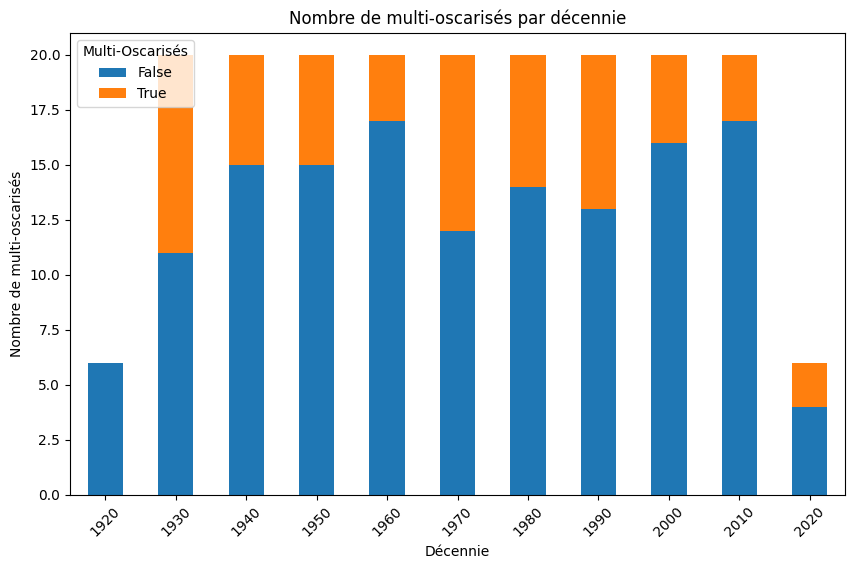

In [19]:
# Ajouter une colonne indiquant si une personne est multi-oscarisée
oscar_counts = df_new.groupby('name').size()
df_new['multi_oscarise'] = df_new['name'].apply(lambda x: oscar_counts[x] > 1)

# Grouper les données par décennie et compter le nombre de multi-oscarisés pour chaque décennie
multi_oscarises_decennie = df_new.groupby(['decade', 'multi_oscarise']).size().unstack()

# Visualiser les informations
multi_oscarises_decennie.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Nombre de multi-oscarisés par décennie')
plt.xlabel('Décennie')
plt.ylabel('Nombre de multi-oscarisés')
plt.xticks(rotation=45)
plt.legend(title='Multi-Oscarisés', loc='upper left')
plt.show()


In [20]:
# Ajouter une colonne indiquant si une personne est multi-oscarisée
oscar_counts = df_new.groupby('name').size()
df_new['multi_oscarise'] = df_new['name'].apply(lambda x: oscar_counts[x] > 1)

# Grouper les données par décennie et compter le nombre de multi-oscarisés pour chaque décennie
multi_oscarises_decennie = df_new.groupby(['decade', 'multi_oscarise']).size().unstack()

# Identifier la décennie avec le plus grand nombre de multi-oscarisés
decennie_max_multi_oscarises = multi_oscarises_decennie[multi_oscarises_decennie[True] == multi_oscarises_decennie[True].max()]

# Sélectionner les données correspondant à cette décennie
df_decennie_max_multi_oscarises = df_new[df_new['decade'] == decennie_max_multi_oscarises.index[0]]

# Afficher les informations sur la décennie avec le plus de multi-oscarisés
print("Décennie avec le plus de multi-oscarisés : ", decennie_max_multi_oscarises.index[0])
print("Nombre de multi-oscarisés dans cette décennie : ", decennie_max_multi_oscarises.iloc[0, 1])


Décennie avec le plus de multi-oscarisés :  1930
Nombre de multi-oscarisés dans cette décennie :  9.0
